In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Preparation

#### Loading the datasets and creating the edges based on the `A4_1.png` picture

In [2]:
df_edges = pd.DataFrame({
    'source': ['A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'B1', 'B1', 'B1', 'B2', 'B2', 'B2', 'B2', 'B3', 'B3', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C4', 'C4', 'C4', 'C5', 'C5', 'C5', 'C5', 'C6', 'C6', 'C6', 'C6', 'C6', 'C7', 'C7', 'C7', 'C8', 'C8', 'C8', 'C9', 'C9', 'C9', 'C10', 'C10', 'C10', 'C11', 'C11', 'C11', 'C12', 'C12', 'C12', 'C13', 'C13', 'C13', 'C14', 'C14', 'C14'],
    'target': ['B2', 'C13', 'C4', 'C7', 'C1', 'C6', 'C14', 'C5', 'C9', 'C5', 'C3', 'C12', 'A1', 'C11', 'C10', 'C2', 'C7', 'C6', 'A1', 'C1', 'C8', 'B2', 'C5', 'C9', 'C11', 'C10', 'C7', 'A1', 'C13','C6', 'B2', 'C3', 'B1', 'C1', 'C8', 'C14', 'C5', 'A1', 'C1', 'A1', 'C4', 'C2', 'C14', 'C6', 'B1', 'C3', 'C11', 'C12', 'C3', 'B3', 'C9', 'C3', 'B3', 'C13', 'B2', 'C10', 'C4', 'A1', 'C12', 'C8', 'C6', 'B1'],
    'distance': [10, 20, 25, 25, 20, 25, 15, 15, 15, 15, 10, 15, 10, 25, 10, 25, 20, 25, 20, 25, 25, 10, 25, 25, 15, 15, 25, 25, 20, 10, 15, 15, 15, 25, 15, 20, 10, 25, 20, 25, 25, 25, 25, 15, 15, 25, 15, 20, 15, 10, 15, 15, 25, 20, 15, 20, 20, 20, 20, 25, 20, 15]
}).reset_index(drop=True)
data = pd.read_csv('./datasets/dataset_cleaned.csv')

In [3]:
df_edges.head()

,source,target,distance
0,A1,B2,10
1,A1,C13,20
2,A1,C4,25
3,A1,C7,25
4,A1,C1,20


In [4]:
data.head()

,NIK,Nama,TTL,Status Hubungan,Status Perkawinan,Gaji,Jenis Pekerjaan,Agama,Jenis Makanan,Kode Rumah,Luas Rumah,age
0,3.359990e+15,Pak Sutajo,"jember, 28 07 1933",Kepala Keluarga,kawin,3000000,Pensiunan,Islam,rawon,A1,280,90
1,3.357030e+15,Bu Sutajo,"jember, 12 07 1940",Istri,kawin,0,Tidak Bekerja,Islam,rawon,A1,280,83
2,3.356440e+15,Pak Jais,"jember, 01 07 1963",Kepala Keluarga,kawin,3000000,Pensiunan,Islam,bakso,B1,240,60
3,3.355550e+15,Bu Jais,"jember, 15 03 1966",Istri,kawin,0,Tidak Bekerja,Islam,bakso,B1,240,57
4,3.354210e+15,Pak Pardi,"jember, 14 12 1965",Kepala Keluarga,kawin,3000000,Pensiunan,Islam,rawon,B2,240,58


#### Making the nodes data by grouping the data by `Kode Rumah`

In [5]:
df_nodes = data.groupby('Kode Rumah').agg({'Kode Rumah': 'first', 'Nama': 'first', 'Gaji': 'sum', 'Luas Rumah': 'first', 'Jenis Makanan': 'first', 'age': 'first'})
df_nodes = df_nodes.reset_index(drop=True)
df_nodes.head()

,Kode Rumah,Nama,Gaji,Luas Rumah,Jenis Makanan,age
0,A1,Pak Sutajo,3000000,280,rawon,90
1,B1,Pak Jais,3000000,240,bakso,60
2,B2,Pak Pardi,3000000,240,rawon,58
3,B3,Pak Udin,6000000,260,ayam bakar,55
4,C1,Pak Suprapto,14322614,200,bakso,48


## Making the Graph

In [6]:
G: nx.Graph = nx.from_pandas_edgelist(df_edges, 'source', 'target', edge_attr='distance')

In [7]:
# Creating a sorted list of nodes
nodes: list[str] = list(G.nodes)
nodes.sort(key=lambda x: (x[0], int(x[1:])))
nodes

['A1',
 'B1',
 'B2',
 'B3',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14']

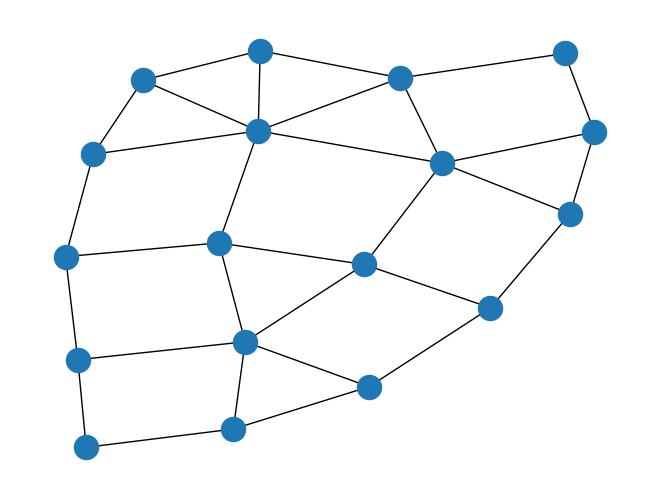

In [8]:
# So that nodes won't intersect each other
positions = nx.spring_layout(G, seed=2)
nx.draw(G, pos=positions)

In [9]:
# Setting the attributes for each node
nodes_with_attributes = {
    row['Kode Rumah']: {
        'Nama': row['Nama'],
        'Gaji': row['Gaji'],
        'Luas Rumah': row['Luas Rumah'],
        'Jenis Makanan': row['Jenis Makanan'],
        'Umur': row['age']
    } for _, row in df_nodes.iterrows()
}

nx.set_node_attributes(G, nodes_with_attributes)

In [10]:
house_names = nx.get_node_attributes(G, 'Nama') # Get the house's heads names
edge_labels = nx.get_edge_attributes(G, 'distance') # Get the distances

{'A1': Text(-0.11223529415507424, 0.4388615724117441, 'A1'),
 'B2': Text(-0.2080825050202488, -0.07057644247127784, 'B2'),
 'C13': Text(-0.5143725036052509, 0.33228405282250595, 'C13'),
 'C4': Text(-0.3937224415265134, 0.668849753635413, 'C4'),
 'C7': Text(-0.10745056975775241, 0.8034429912096658, 'C7'),
 'C1': Text(0.23427669055271927, 0.6794888462985474, 'C1'),
 'C6': Text(0.3359298546286129, 0.2919402097752804, 'C6'),
 'B1': Text(0.4539444587575966, -0.36588476655732594, 'B1'),
 'C14': Text(0.6478752350179028, 0.06167608349893494, 'C14'),
 'C5': Text(0.14628128812372443, -0.16869020800689408, 'C5'),
 'C9': Text(0.15794149202160757, -0.7243654700721021, 'C9'),
 'C3': Text(-0.14410178704831555, -0.5200465903543777, 'C3'),
 'C12': Text(-0.5819451562057255, -0.13284991644205285, 'C12'),
 'B3': Text(-0.5316265349640281, -0.9999999999999999, 'B3'),
 'C11': Text(-0.17287154494095616, -0.9167346214679188, 'C11'),
 'C10': Text(-0.552043817373, -0.6016099331537689, 'C10'),
 'C2': Text(0.63480

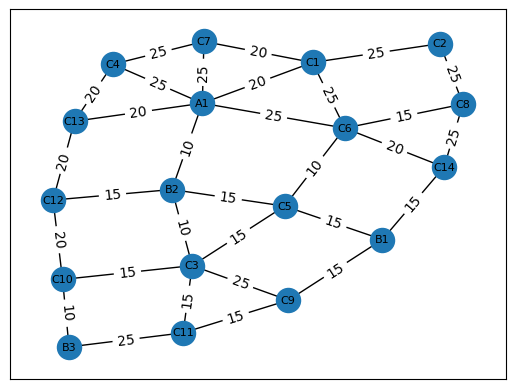

In [11]:
# Drawing the Graph
nx.draw_networkx_nodes(G, pos=positions)
nx.draw_networkx_edges(G, pos=positions)
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos=positions, font_size=8)

#### Drawing the centralities

In [12]:
def draw_centrality(title: str, centrality: dict):
    node_values = list(centrality.values()) # Converting the centrality values to a list
    
    # Draw the Graph with each node's color following each value of node_values list
    nx.draw(G, pos=positions, node_color=node_values)
    
    # Draw the labels (Name attribute in the node)
    nx.draw_networkx_labels(G, pos=positions, labels=house_names, font_size=8)
    
    # Creating a ScallarMappable to map the node_values to a measurement
    sm = cm.ScalarMappable()
    sm.set_array(node_values) # Setting the value for color map
    
    plt.title(title)
    plt.colorbar(sm, ax=plt.gca()) # Setting the color bar values to the Scallar Mappable values
    plt.show()

#### Drawing the closeness centrality

Closeness centrality quantifies how close a node is to all other nodes in the network. The closer a node is to all other nodes, the higher its closeness centrality.

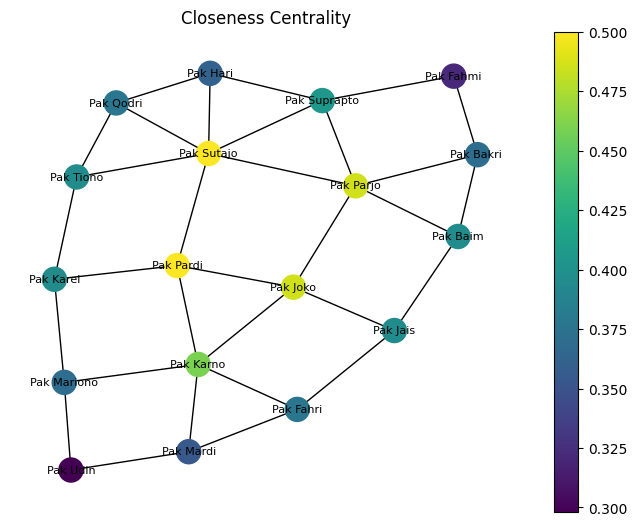

In [13]:
draw_centrality(title="Closeness Centrality", centrality=nx.closeness_centrality(G))

Thus, `Pak Pardi` and `Pak Sutajo` have the closest house to all family member's houses

#### Drawing the degree centrality
Degree centrality is a measure of the importance of a node in a network based on the number of connections it has to other nodes. Nodes with high degree centrality can represent important entities in a network

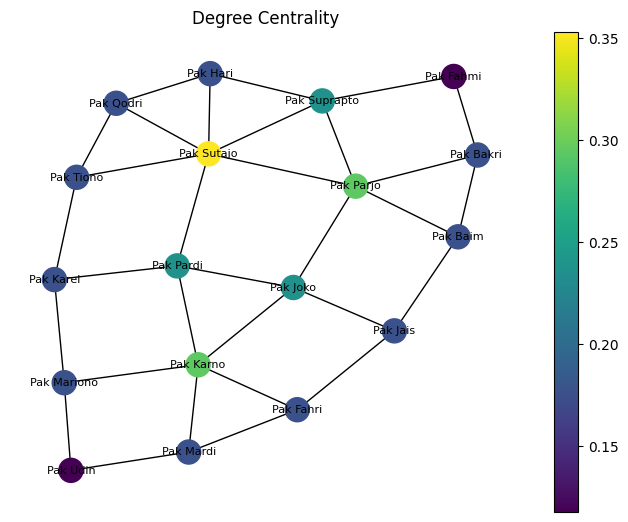

In [14]:
draw_centrality(title="Degree Centrality", centrality=nx.degree_centrality(G))

Thus, `Pak Sutajo` have the most connections to other houses

#### Drawing the betweeness centrality

Betweenness centrality is a measure of the importance of a node in a network based on the number of shortest paths that pass through that node. Nodes with high betweenness centrality have a significant influence on the flow of information or interactions within the network.

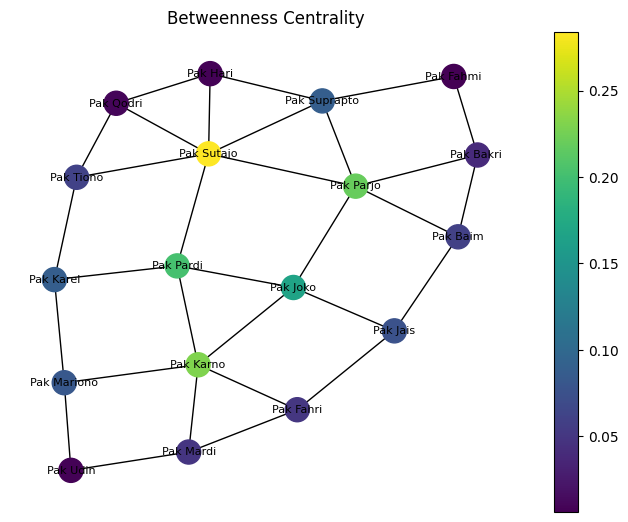

In [15]:
draw_centrality(title="Betweenness Centrality", centrality=nx.betweenness_centrality(G))

Thus, `Pak Sutajo`'s house can be passed via most shortest paths

#### Conclusion
Based on the three centralities, the house of `Pak Sutajo` have the most significant influence on the other houses

## Finding the shortest paths

In [16]:
# Use dijkstra's algorithm to find the shortest
def find_shortest_path(G: nx.Graph, start: str, end: str):
    graph_copy = G.copy() # Avoid modifying the actual graph
    distances = {node: float('inf') for node in graph_copy.nodes}
    
    if start not in graph_copy.nodes:
        raise ValueError("The start node is not in the Graph")

    distances[start] = 0
    shortest_paths = dict()
    
    # Unvisited nodes
    unvisited = set(graph_copy.nodes)
    
    while unvisited:
        # Get the node with the smallest distance
        current = min(unvisited, key=lambda node: distances[node])
        
        # No more reachable nodes
        if distances[current] == float('inf'):
            break
        
        for neighbor in graph_copy.neighbors(current):
            new_distance = distances[current] + graph_copy[current][neighbor]['distance']
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                shortest_paths[neighbor] = current
        
        # Remove the current node from the unvisited list
        unvisited.remove(current)
        
    
    # Building the shortest path
    path = list()
    current_node = end
    total_distance = 0 # Keep track of the total distance traveled
    while current_node in shortest_paths:
        path.insert(0, current_node)
        total_distance += graph_copy[current_node][shortest_paths[current_node]]['distance']
        current_node = shortest_paths[current_node] # Update the current_node to be the shortest path to that node
    
    # Insert the starting node to the path
    path.insert(0, start)
    return path, total_distance

def generate_path(start_node: str):
    temp_nodes = nodes.copy()
    if start_node in temp_nodes:
        temp_nodes.remove(start_node)
    temp_nodes.insert(0, start_node)
    
    return [find_shortest_path(G, temp_nodes[i], temp_nodes[i + 1]) for i in range(len(temp_nodes) - 1)]


In [17]:
# Choosing the family that has the 'C14' house code
family_house_code = 'C14'

# Get each family's head name
family_names = nx.get_node_attributes(G, 'Nama')

family_house_head = family_names[family_house_code] # Get the chosen family's head

In [18]:
paths_and_distances = generate_path(family_house_code) # Generate all paths and distances from the 'C14' node

paths = [paths_and_distances[i][0] for i in range(len(paths_and_distances))]
distances: list[int] = [paths_and_distances[i][1] for i in range(len(paths_and_distances))]

In [19]:
def draw_highlighted_path(path: list[str]):
    edges = set(list(zip(path, path[1:]))) # Creates the edges by zipping the path with the path[1:]
    
    # Draws the graph
    nx.draw_networkx_nodes(G, pos=positions)
    nx.draw_networkx_edges(G, pos=positions)
    nx.draw_networkx_labels(G, pos=positions, labels=house_names, font_size=7)
    nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels)
    
    # Draws the highlighted path
    nx.draw_networkx_edges(G, pos=positions, edgelist=edges, edge_color='red')
    nx.draw_networkx_nodes(G, pos=positions, nodelist=path, node_color='red')
    
    plt.show()

Paths from Pak Baim's house to Pak Sutajo's house


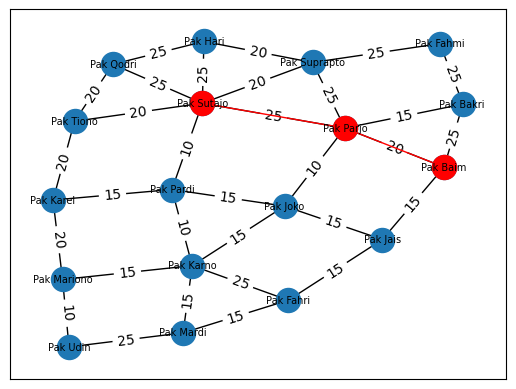

Paths from Pak Sutajo's house to Pak Jais's house


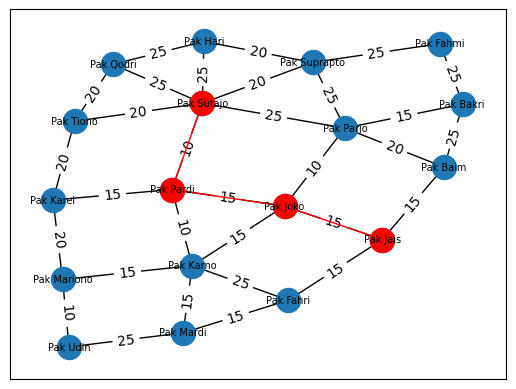

Paths from Pak Jais's house to Pak Pardi's house


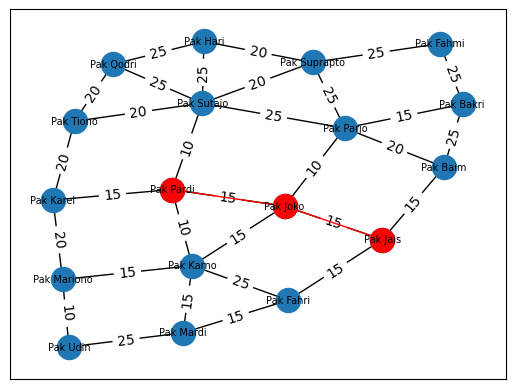

Paths from Pak Pardi's house to Pak Udin's house


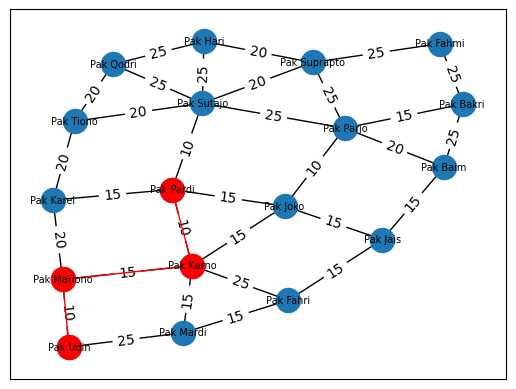

Paths from Pak Udin's house to Pak Suprapto's house


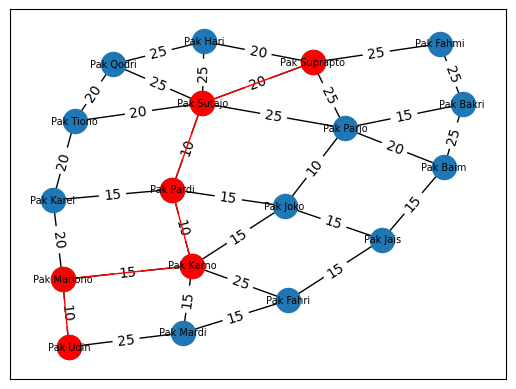

Paths from Pak Suprapto's house to Pak Fahmi's house


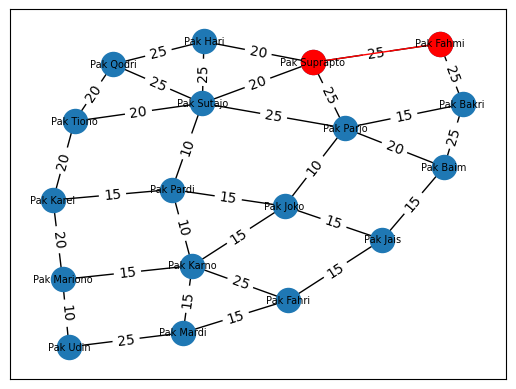

Paths from Pak Fahmi's house to Pak Karno's house


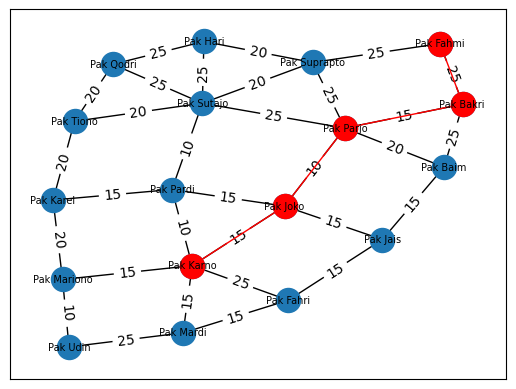

Paths from Pak Karno's house to Pak Qodri's house


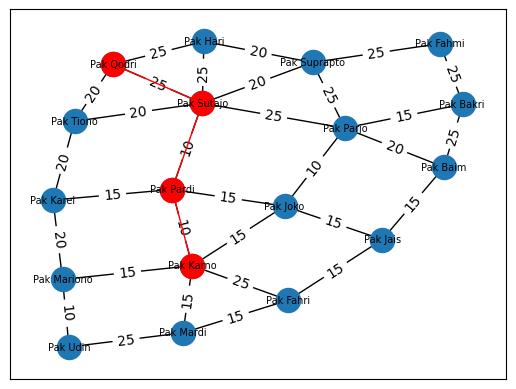

Paths from Pak Qodri's house to Pak Joko's house


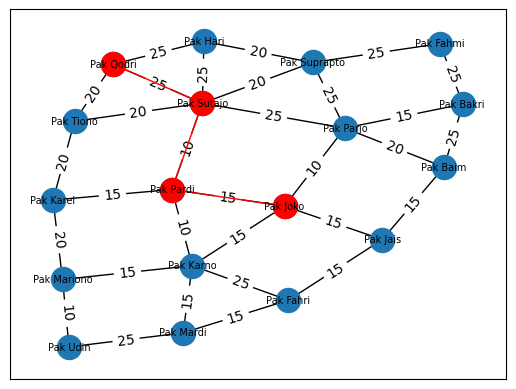

Paths from Pak Joko's house to Pak Parjo's house


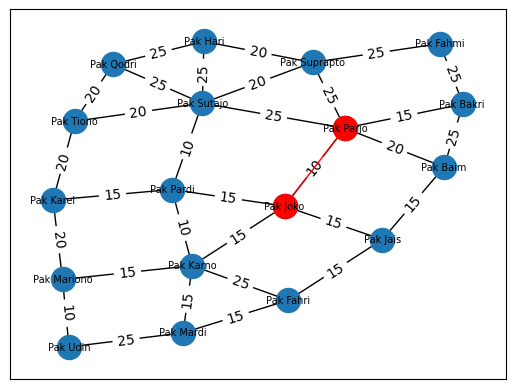

Paths from Pak Parjo's house to Pak Hari's house


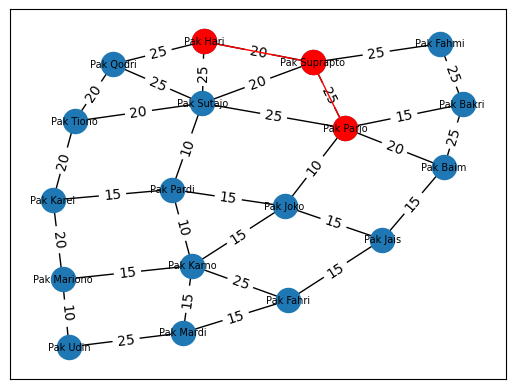

Paths from Pak Hari's house to Pak Bakri 's house


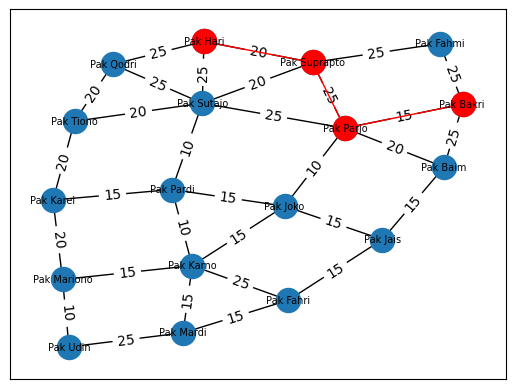

Paths from Pak Bakri 's house to Pak Fahri's house


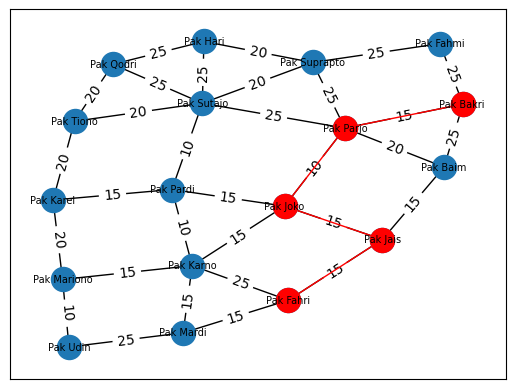

Paths from Pak Fahri's house to Pak Mariono's house


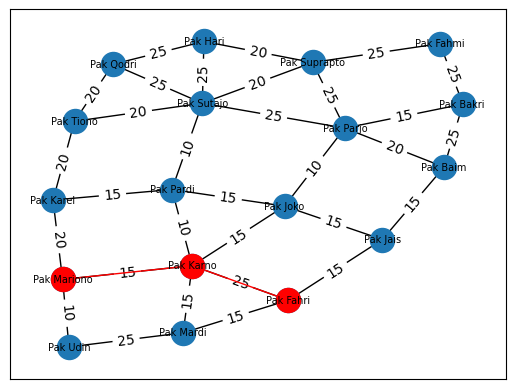

Paths from Pak Mariono's house to Pak Mardi's house


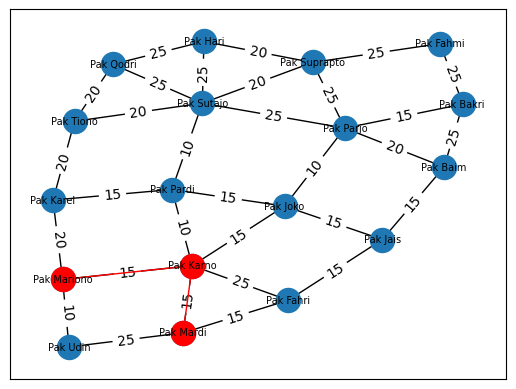

Paths from Pak Mardi's house to Pak Karel's house


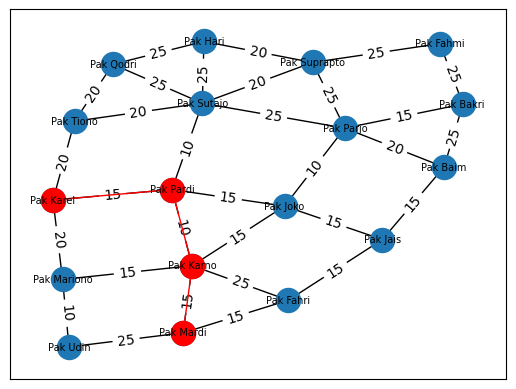

Paths from Pak Karel's house to Pak Tiono's house


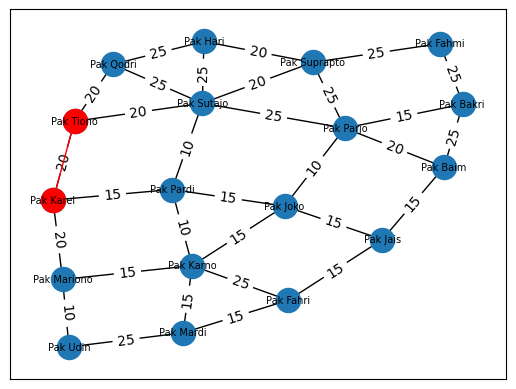

In [20]:
for i in range(len(paths)):
    from_house = paths[i][0] # Get the start node
    to_house = paths[i][len(paths[i]) - 1] # Get the end node
    
    from_house_head = family_names[from_house] 
    to_house_head = family_names[to_house]
    
    print(f"Paths from {from_house_head}'s house to {to_house_head}'s house")
    draw_highlighted_path(paths[i])

#### Limiting visit time to 8 hours per day

In [21]:
house_areas = nx.get_node_attributes(G, 'Luas Rumah')
house_areas

{'A1': 280,
 'B2': 240,
 'C13': 230,
 'C4': 200,
 'C7': 200,
 'C1': 200,
 'C6': 180,
 'B1': 240,
 'C14': 180,
 'C5': 240,
 'C9': 210,
 'C3': 120,
 'C12': 110,
 'B3': 260,
 'C11': 100,
 'C10': 180,
 'C2': 240,
 'C8': 230}

In [22]:
# NOTE: the area is in square meters
# Will calculate the visit time in hours
def calc_visit_time(house_code: str):
    area = house_areas[house_code]
    return 30 / 60 if area >= 200 else 15 / 60 # Divide it with 60 to convert it to hours scale

#### Creating the simulation

Simulating Pak Baim's family visits
Day 1
Visiting Pak Sutajo's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 0.5 hours
House's Area: 280m^2
Distances Traveled: 45m


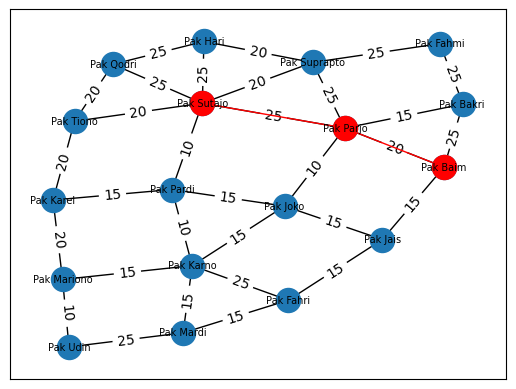

Day 1
Visiting Pak Jais's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 1.0 hours
House's Area: 240m^2
Distances Traveled: 40m


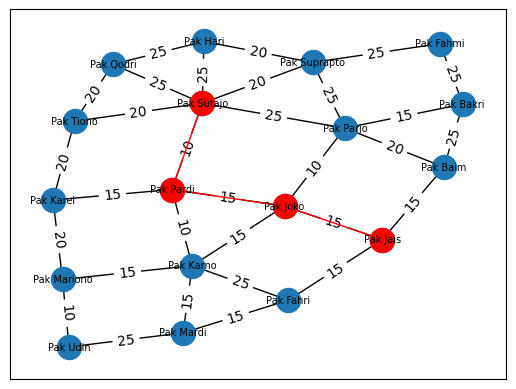

Day 1
Visiting Pak Pardi's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 1.5 hours
House's Area: 240m^2
Distances Traveled: 30m


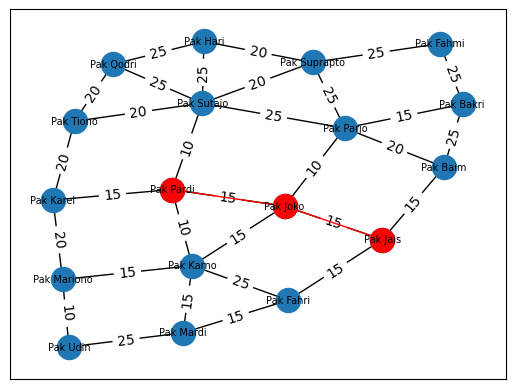

Day 1
Visiting Pak Udin's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 2.0 hours
House's Area: 260m^2
Distances Traveled: 35m


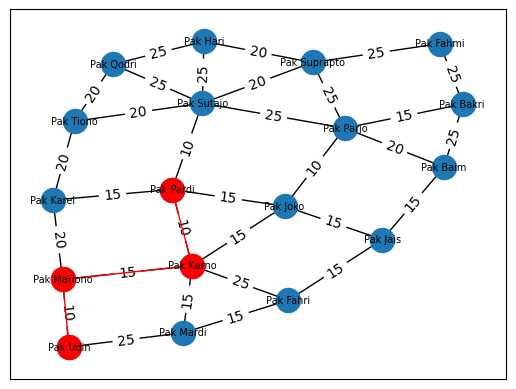

Day 1
Visiting Pak Suprapto's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 2.5 hours
House's Area: 200m^2
Distances Traveled: 65m


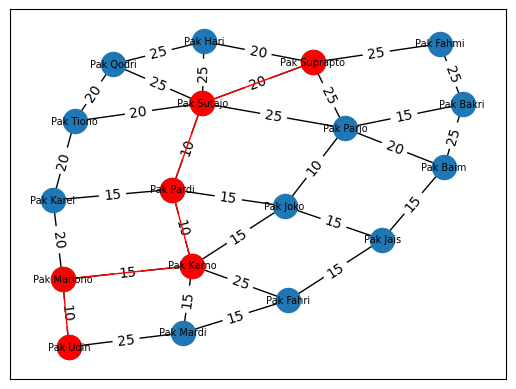

Day 1
Visiting Pak Fahmi's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 3.0 hours
House's Area: 240m^2
Distances Traveled: 25m


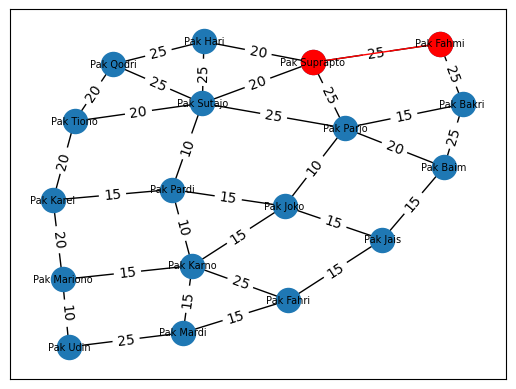

Day 1
Visiting Pak Karno's house
Visit Time: 15 minutes
Total Sillaturahmi Time: 3.25 hours
House's Area: 120m^2
Distances Traveled: 65m


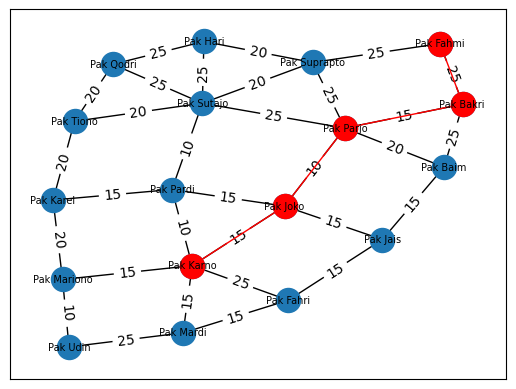

Day 1
Visiting Pak Qodri's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 3.75 hours
House's Area: 200m^2
Distances Traveled: 45m


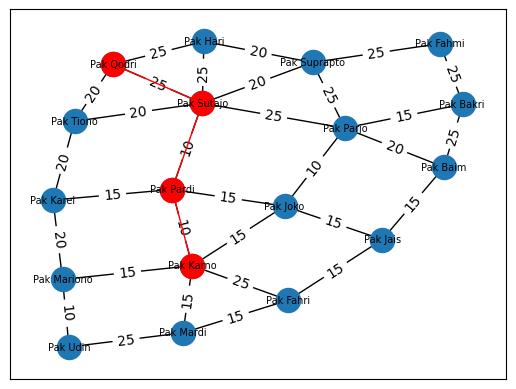

Day 1
Visiting Pak Joko's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 4.25 hours
House's Area: 240m^2
Distances Traveled: 50m


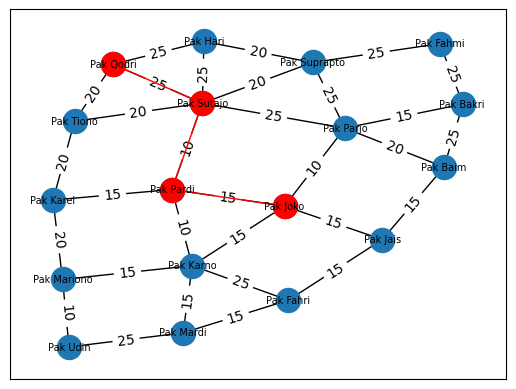

Day 1
Visiting Pak Parjo's house
Visit Time: 15 minutes
Total Sillaturahmi Time: 4.5 hours
House's Area: 180m^2
Distances Traveled: 10m


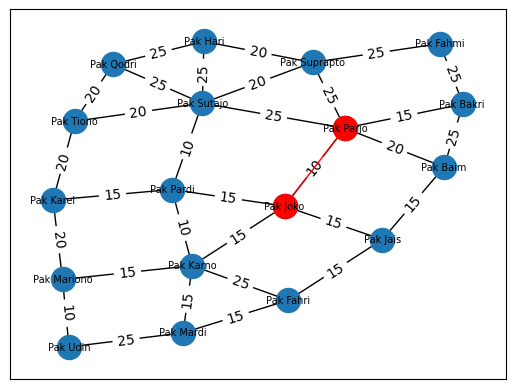

Day 1
Visiting Pak Hari's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 5.0 hours
House's Area: 200m^2
Distances Traveled: 45m


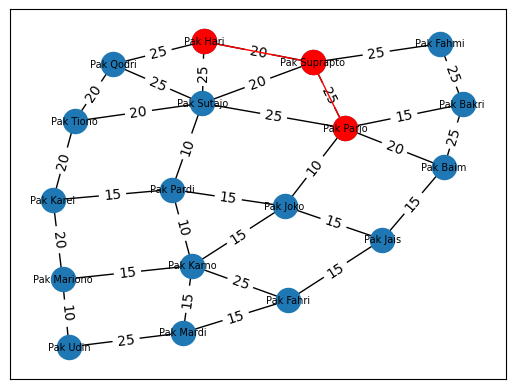

Day 1
Visiting Pak Bakri 's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 5.5 hours
House's Area: 230m^2
Distances Traveled: 60m


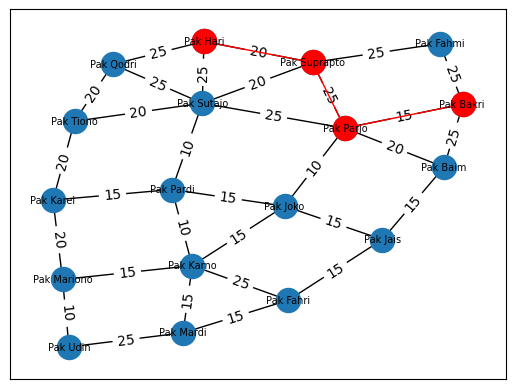

Day 1
Visiting Pak Fahri's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 6.0 hours
House's Area: 210m^2
Distances Traveled: 55m


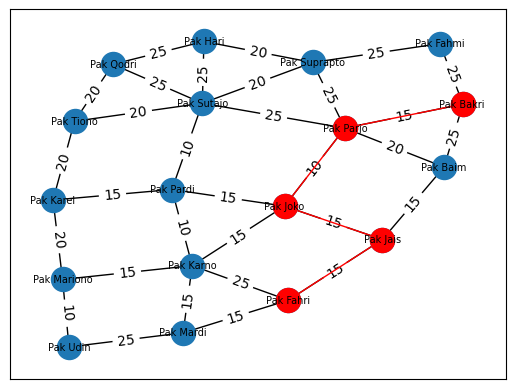

Day 1
Visiting Pak Mariono's house
Visit Time: 15 minutes
Total Sillaturahmi Time: 6.25 hours
House's Area: 180m^2
Distances Traveled: 40m


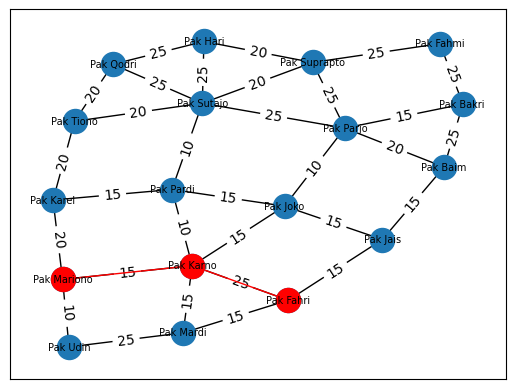

Day 1
Visiting Pak Mardi's house
Visit Time: 15 minutes
Total Sillaturahmi Time: 6.5 hours
House's Area: 100m^2
Distances Traveled: 30m


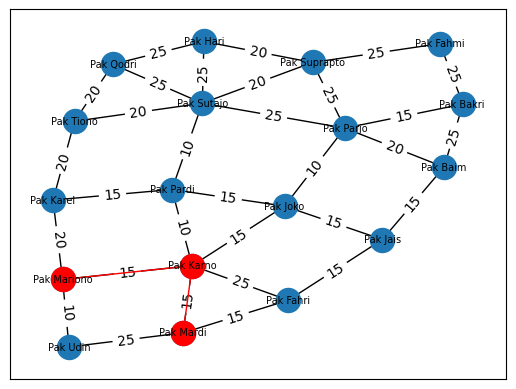

Day 1
Visiting Pak Karel's house
Visit Time: 15 minutes
Total Sillaturahmi Time: 6.75 hours
House's Area: 110m^2
Distances Traveled: 40m


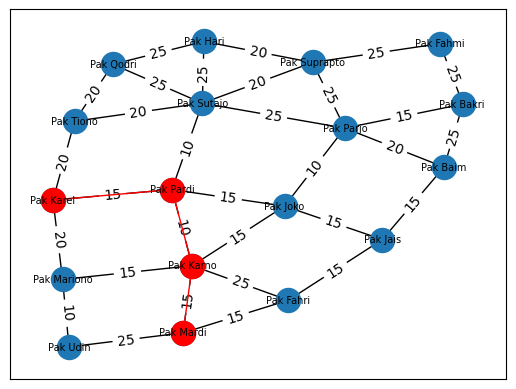

Day 1
Visiting Pak Tiono's house
Visit Time: 30 minutes
Total Sillaturahmi Time: 7.25 hours
House's Area: 230m^2
Distances Traveled: 20m


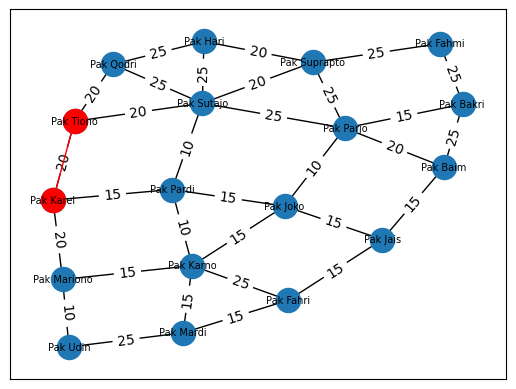

In [23]:
TIME_LIMIT = 8 # 8 Hours limit per day
total_visit_time_today = 0
day = 1

print(f"Simulating {family_house_head}'s family visits\n================================")

for i in range(len(paths)):
    from_house = paths[i][0] # Get the start node
    to_house = paths[i][len(paths[i]) - 1] # Get the end node
    
    from_house_head = family_names[from_house] 
    to_house_head = family_names[to_house]
    
    # Calculating the visit time in hours
    visit_time = calc_visit_time(to_house)
    total_visit_time_today += visit_time
    
    if total_visit_time_today >= 8:
        total_visit_time_today = 0 # Reset
        day += 1 # Continue the next day
    
    print(f"Day {day}")
    print(f"Visiting {to_house_head}'s house")
    print(f"Visit Time: {int(visit_time * 60)} minutes")
    print(f"Total Sillaturahmi Time: {total_visit_time_today} hours")
    print(f"House's Area: {house_areas[to_house]}m^2")
    print(f"Distances Traveled: {distances[i]}m") # The length of distances and paths are equal
    draw_highlighted_path(paths[i])

#### Analyzing the type of foods collected from the visits

In [24]:
foods: dict = nx.get_node_attributes(G, 'Jenis Makanan')
foods

{'A1': 'rawon',
 'B2': 'rawon',
 'C13': 'bakso',
 'C4': 'bakso',
 'C7': 'opor',
 'C1': 'bakso',
 'C6': 'ayam bakar',
 'B1': 'bakso',
 'C14': 'soto',
 'C5': 'rawon',
 'C9': 'bakso',
 'C3': 'opor',
 'C12': 'soto',
 'B3': 'ayam bakar',
 'C11': 'opor',
 'C10': 'soto',
 'C2': 'opor',
 'C8': 'ayam bakar'}

In [25]:
# Get food types
food_types = set(list(foods.values()))

In [26]:
number_of_foods: dict[str, int] = {food_type: 0 for food_type in food_types} # Track the number of food types collected

# Keeping track of the previous food type
prev_food_type: str = ''
food_type_repetition: int = 0

for i in range(len(paths)):
    from_house = paths[i][0] # Get the start node
    to_house = paths[i][len(paths[i]) - 1] # Get the end node
    
    from_house_head = family_names[from_house] 
    to_house_head = family_names[to_house]
    
    # Get the visited family's food type
    food_type = foods[to_house]
    number_of_foods[food_type] += 1
    
    # Counting the number of food type repetitions
    if prev_food_type == food_type:
        food_type_repetition += 1
    prev_food_type = food_type
    
    print(f"from {from_house_head}'s house to {to_house_head}'s house")
    print(f"{to_house_head} gave {food_type}\n")

from Pak Baim's house to Pak Sutajo's house
Pak Sutajo gave rawon

from Pak Sutajo's house to Pak Jais's house
Pak Jais gave bakso

from Pak Jais's house to Pak Pardi's house
Pak Pardi gave rawon

from Pak Pardi's house to Pak Udin's house
Pak Udin gave ayam bakar

from Pak Udin's house to Pak Suprapto's house
Pak Suprapto gave bakso

from Pak Suprapto's house to Pak Fahmi's house
Pak Fahmi gave opor

from Pak Fahmi's house to Pak Karno's house
Pak Karno gave opor

from Pak Karno's house to Pak Qodri's house
Pak Qodri gave bakso

from Pak Qodri's house to Pak Joko's house
Pak Joko gave rawon

from Pak Joko's house to Pak Parjo's house
Pak Parjo gave ayam bakar

from Pak Parjo's house to Pak Hari's house
Pak Hari gave opor

from Pak Hari's house to Pak Bakri 's house
Pak Bakri  gave ayam bakar

from Pak Bakri 's house to Pak Fahri's house
Pak Fahri gave bakso

from Pak Fahri's house to Pak Mariono's house
Pak Mariono gave soto

from Pak Mariono's house to Pak Mardi's house
Pak Mardi gav

In [27]:
print("We got:")

for food_type in number_of_foods.keys():
    print(f"{number_of_foods[food_type]} {food_type}")    

We got:
3 rawon
4 opor
3 ayam bakar
2 soto
5 bakso


In [28]:
print(f"Food repetition happens {food_type_repetition} times")

Food repetition happens 1 times


#### Calculating the amount of THR

In [29]:
# Get all the family members data
family_members = data[data['Kode Rumah'] == family_house_code]
family_members

,NIK,Nama,TTL,Status Hubungan,Status Perkawinan,Gaji,Jenis Pekerjaan,Agama,Jenis Makanan,Kode Rumah,Luas Rumah,age
34,3.359890e+15,Pak Baim,"Banyuwangi, 07 02 1991",Kepala Keluarga,kawin,8302140,BUMN,Islam,soto,C14,180,32
35,3.358350e+15,Bu Baim,"Jember, 27 05 1992",Istri,kawin,5322783,Swasta,Islam,soto,C14,180,31
73,3.358450e+15,Mail,"Jember, 17 Februari 2000",anak,belum kawin,0,TIdak Bekerja,Islam,soto,C14,180,23
74,3.356020e+15,Susanti,"Jember, 27 Februari 2007",anak,belum kawin,0,TIdak Bekerja,Islam,soto,C14,180,16


In [30]:
def calculate_thr(family_members: pd.DataFrame):
    THR = 50_000 # The THR will always be 50,000
    total_thr_received = 0 # Keep track of the amount of THR we got from others
    
    # Get the family members that's 17 y.o or younger
    youth = family_members[family_members['age'] <= 17]
    number_of_youth = len(youth.values.tolist())
    
    for i in range(len(paths)):
        to_house = paths[i][len(paths[i]) - 1]
        to_house_head = family_names[to_house]
        thr_received = number_of_youth * THR
        total_thr_received += thr_received
        
        # Get the name of all the THR receiver
        thr_receivers = youth['Nama'].values.tolist()
        stringified_thr_receivers = f"{', '.join(thr_receivers)}"
        
        if stringified_thr_receivers == '':
            print("No youths found")
            break
        
        print(f"{stringified_thr_receivers} received a total of Rp.{thr_received} from {to_house_head}'s family")
    
    return total_thr_received

total_thr_received = calculate_thr(family_members)
print(f"We get a total of Rp.{total_thr_received}")


Susanti received a total of Rp.50000 from Pak Sutajo's family
Susanti received a total of Rp.50000 from Pak Jais's family
Susanti received a total of Rp.50000 from Pak Pardi's family
Susanti received a total of Rp.50000 from Pak Udin's family
Susanti received a total of Rp.50000 from Pak Suprapto's family
Susanti received a total of Rp.50000 from Pak Fahmi's family
Susanti received a total of Rp.50000 from Pak Karno's family
Susanti received a total of Rp.50000 from Pak Qodri's family
Susanti received a total of Rp.50000 from Pak Joko's family
Susanti received a total of Rp.50000 from Pak Parjo's family
Susanti received a total of Rp.50000 from Pak Hari's family
Susanti received a total of Rp.50000 from Pak Bakri 's family
Susanti received a total of Rp.50000 from Pak Fahri's family
Susanti received a total of Rp.50000 from Pak Mariono's family
Susanti received a total of Rp.50000 from Pak Mardi's family
Susanti received a total of Rp.50000 from Pak Karel's family
Susanti received a to